# Manipulation d'image avec opencv

Opencv dispose d'outils de lecture d'image, visualisation et différents processus d'amélioration.

In [12]:
# DATA et affichage
import pandas as pd # gestion de dataframe
import numpy as np  # gestion de vecteurs

import random # librairie de generation de nombre/variable aleatoire
import time # libraire de gestion du temps.

import seaborn as sns # librairie de visualisation, ideale pour les dataframes
import matplotlib.pyplot as plt # librairie de visualisation
import matplotlib as mpl # librairie de visualisation

%matplotlib inline

#python -m pip install opencv-python , necessite matplotlib et numpy installer.
import cv2 #opencv

## Lecture d'une image RGB (opencv BGR).

img=cv2.imread("chausey.jpg")
print(type(img))
print(img.shape)


<class 'numpy.ndarray'>
(600, 900, 3)


**Visualisation d'une image**

In [13]:
cv2.imshow('Chausey',img)
cv2.waitKey(0)
cv2.destroyWindow('Chausey')


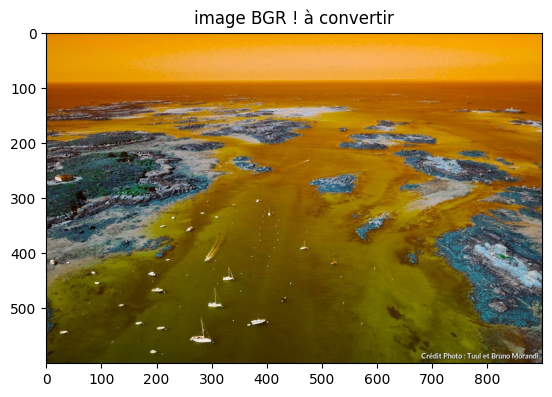

In [14]:
plt.imshow(img[::]) #matplotlib affiche une image RGB or img est au format BGR.
plt.title("image BGR ! à convertir")
plt.show()

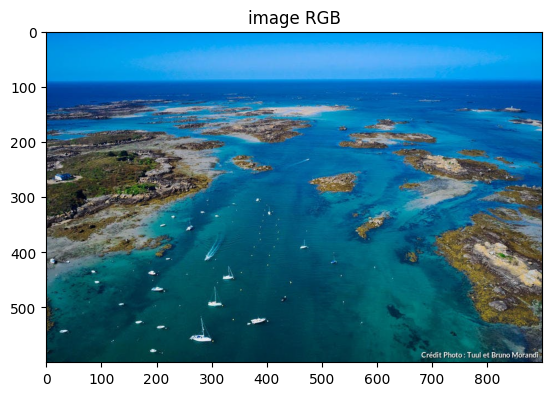

In [15]:
imgRGB=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.title("image RGB")
plt.show()

Visualisation des intensités de chaque composante couleur

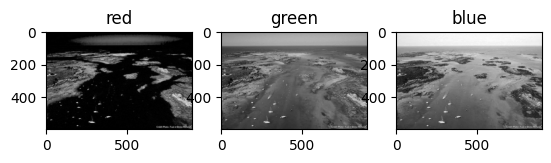

In [16]:
plt.figure(1)
plt.subplot(131)
plt.imshow(imgRGB[:,:,0], cmap=plt.get_cmap('gray'))
plt.title("red")
plt.subplot(132)
plt.imshow(imgRGB[:,:,1], cmap=plt.get_cmap('gray'))
plt.title("green")
plt.subplot(133)
plt.imshow(imgRGB[:,:,2], cmap=plt.get_cmap('gray'))
plt.title("blue")
plt.show()

**Etude des histogrammes de chaque image**

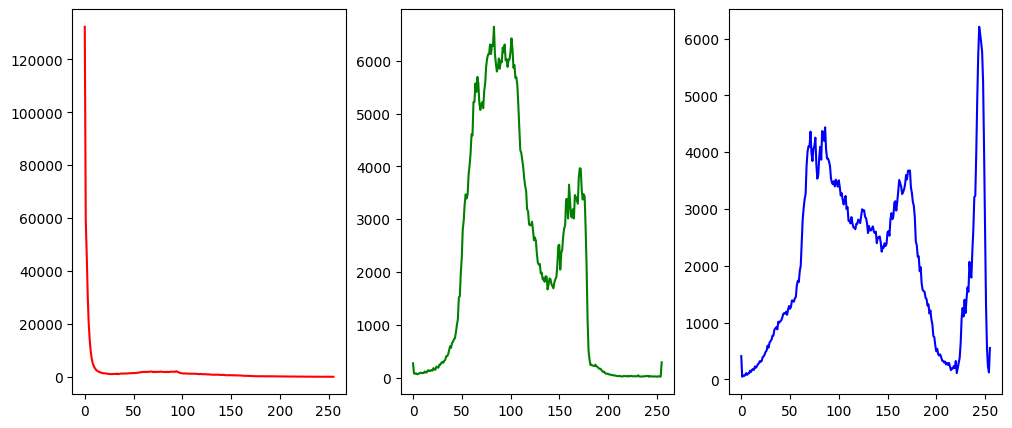

In [17]:
histB = cv2.calcHist([img],[0],None,[256],[0,256])
histG = cv2.calcHist([img],[1],None,[256],[0,256])
histR = cv2.calcHist([img],[2],None,[256],[0,256])

figure,axis = plt.subplots(1,3,figsize=(12,5))
axis[2].plot(histB, color='b')
axis[1].plot(histG, color='g')
axis[0].plot(histR, color='r')
plt.show()

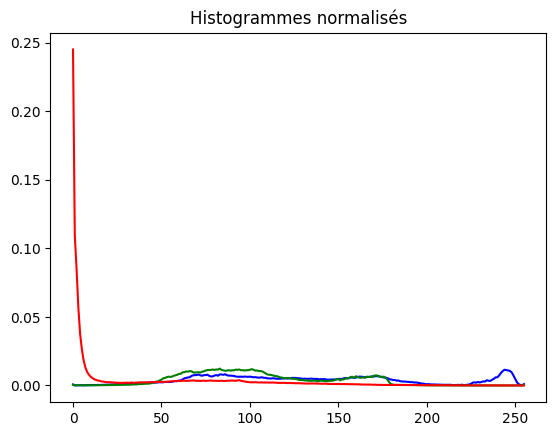

In [18]:
NBPixel=img.shape[0]*img.shape[1]
couleurs = ('b','g','r')
for i,couleur in enumerate(couleurs):
    hist = cv2.calcHist([img],[i],None,[256],[0,256])/NBPixel
    plt.plot(hist,color = couleur)
plt.title('Histogrammes normalisés')
plt.show()

**Segmentation par des filtres couleurs**

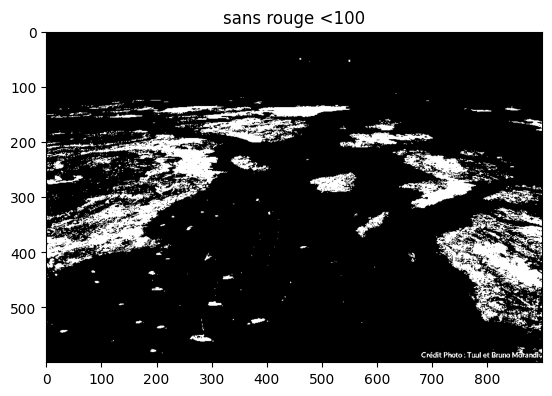

In [19]:
seuil=100 #jouer avec le seuil de 0 à 255
maskRouge = np.where(img[:,:,2]<seuil, 0, 1)
plt.imshow(maskRouge, cmap=plt.get_cmap('gray'))
plt.title("sans rouge <"+str(seuil))
plt.show()

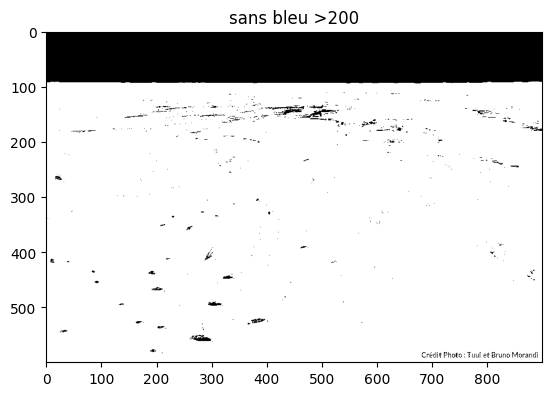

In [20]:
maskCiel = np.where(img[:,:,0]>200, 0, 1)
plt.imshow(maskCiel, cmap=plt.get_cmap('gray'))
plt.title("sans bleu >200")
plt.show()

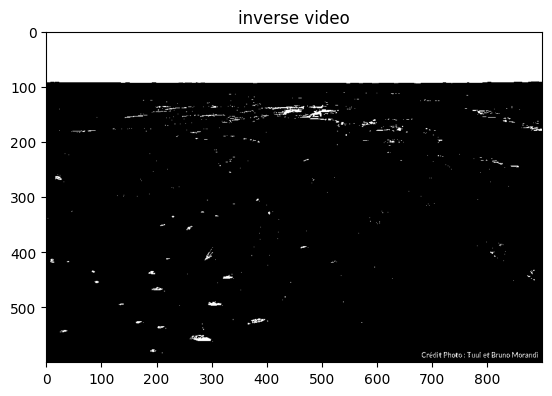

In [26]:
inverse=1-maskCiel
plt.imshow(inverse, cmap=plt.get_cmap('gray'))
plt.title("inverse video")
plt.show()

**Opérateur Morphomathématique**.

Les opérateurs logiques AND et OR permettent d'éroder ou les dilater les blancs. En le combinant, cela permet de combler des trous ou supprimer du bruit.

Ce opérateurs sont des opérateurs dit de voisinage, la valeur d'un pixel est calculé en fonction de son voisinage donné et l'opérateur.

Voisinages usuels : filtre carré, filtre croix, filtre horizontal, filtre vertical...  

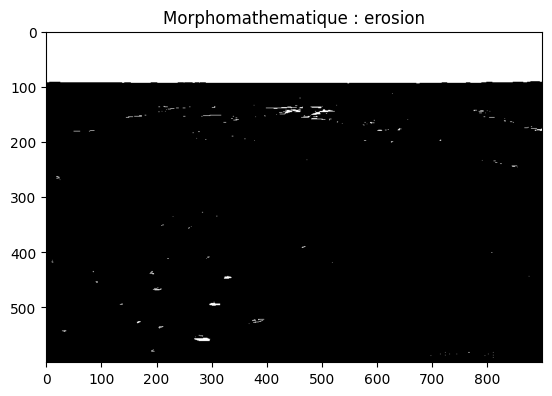

In [56]:
voisinage=np.array([[1,1,1,1,1]],np.uint8)
#voisinage=np.ones((10,10),np.uint8)

mat=np.array(inverse, np.uint8)
res=cv2.erode(mat,voisinage,iterations=1)

plt.imshow(res, cmap=plt.get_cmap('gray'))
plt.title("Morphomathematique : erosion")
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


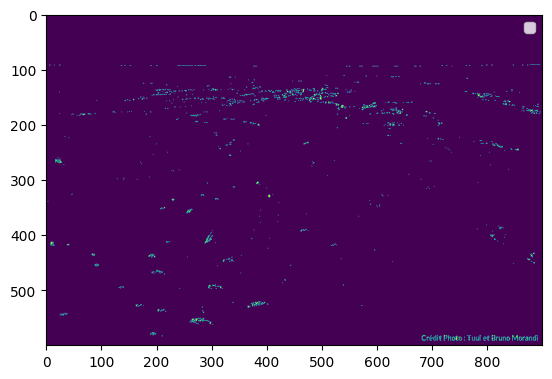

In [57]:
plt.imshow(res-mat)
plt.legend()
plt.show()

Segmentation à partir de l'**espace de couleurs HSV** Hue/Saturation/Value.

Dans cet espace, la première valeur correspond à un angle (une couleur), les deux suivants permettent de différencier sa luminosité (échelle de nuances).  


In [42]:
## convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

## masque des verts toute nuance confondues (36,0,0) ~ (70, 255,255)
maskVert = cv2.inRange(hsv, (36, 0, 0), (70, 255,255))

## masque des jaunes (15,0,0) ~ (36, 255, 255)
maskJaune = cv2.inRange(hsv, (15,0,0), (36, 255, 255))

## masque des marrons (23,0,255) ~ (31, 255, 255)
maskMarron = cv2.inRange(hsv, (23,0,255), (31, 255, 255))

## ajout des couleurs admissibles (opérateur logique OR/OU)
mask = cv2.bitwise_or(maskVert, maskJaune, maskMarron)
iles = cv2.bitwise_and(img,img, mask=mask)

cv2.imshow("terres", iles)
cv2.waitKey()
cv2.destroyAllWindows()


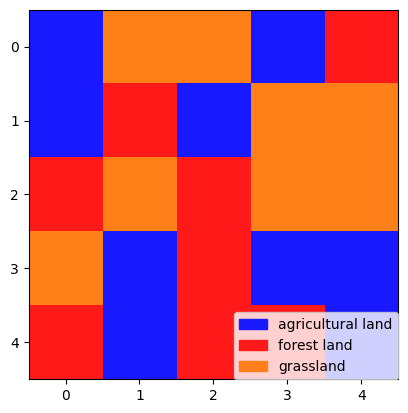

In [44]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
##arrayLucc is the array of land use types 
arrayLucc = np.random.randint(1,4,(5,5))
## first you need to define your color map and value name as a dic
t = 1 ## alpha value
cmap = {1:[0.1,0.1,1.0,t],2:[1.0,0.1,0.1,t],3:[1.0,0.5,0.1,t]}
labels = {1:'agricultural land',2:'forest land',3:'grassland'}
arrayShow = np.array([[cmap[i] for i in j] for j in arrayLucc])    
## create patches as legend
patches =[mpatches.Patch(color=cmap[i],label=labels[i]) for i in cmap]

plt.imshow(arrayShow)
plt.legend(handles=patches, loc=4, borderaxespad=0.)
plt.show()